In [3]:
import json
import requests
import datetime as dt
import numpy as np
import pandas as pd
from binance.client import Client
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import \
    TimeSeriesSplit  # you have everything done for you
# for time-series cross-validation set 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Getting data for last year with 30 min interval

In [90]:
api_key='hKmlFuyZiyNlaN6ARvCKnhF5owS6yrVJolMeSBfThE5Hc6L26aRM2Z3N8EuVQf0y'
secret_key='B4c5Cr9vwsubR19XK05axHk6aSGhnP91GdXLY57LlaYoUNMf4s5egKIHhtgfJYAd'

client = Client(api_key, secret_key)

df= pd.DataFrame(client.get_historical_klines('BTCUSDT','5m',
                                              str((dt.datetime.now() - dt.timedelta(weeks=2.5))),
                                              str((dt.datetime.now()))))

df.columns=['open_time','open','high','low','close','volume',
           'close_time','q_vol','trades','taker_buy_volume',
            'taker_q_volume','ignored']

df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['open_time'] = df.open_time + dt.timedelta(hours=3)
df = df.set_index('open_time')

df['const'] = np.ones(len(df))

df['trend'] = np.arange(len(df))
df['time'] = df.index 
df=df.drop('close_time',axis=1)
df=df.astype(np.float32,errors='ignore')
df

,open,high,low,close,volume,q_vol,trades,taker_buy_volume,taker_q_volume,ignored,const,trend,time
open_time,,,,,,,,,,,,,
2023-07-11 08:30:00,30462.050781,30462.050781,30454.070312,30454.080078,64.539490,1.965682e+06,1118.0,12.566930,3.827484e+05,0.0,1.0,0.0,2023-07-11 08:30:00
2023-07-11 08:35:00,30454.080078,30468.500000,30454.070312,30460.339844,52.332802,1.594072e+06,1396.0,26.328159,8.019873e+05,0.0,1.0,1.0,2023-07-11 08:35:00
2023-07-11 08:40:00,30460.330078,30460.339844,30440.000000,30441.160156,30.708050,9.350642e+05,1212.0,9.414540,2.866542e+05,0.0,1.0,2.0,2023-07-11 08:40:00
2023-07-11 08:45:00,30441.150391,30461.080078,30441.150391,30461.070312,40.522518,1.233979e+06,1349.0,25.493610,7.762971e+05,0.0,1.0,3.0,2023-07-11 08:45:00
2023-07-11 08:50:00,30461.070312,30465.000000,30442.609375,30442.609375,66.637787,2.029558e+06,1153.0,11.322630,3.448525e+05,0.0,1.0,4.0,2023-07-11 08:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28 17:05:00,29304.080078,29312.390625,29301.330078,29312.380859,76.253242,2.234589e+06,1790.0,48.736359,1.428204e+06,0.0,1.0,4999.0,2023-07-28 17:05:00
2023-07-28 17:10:00,29312.380859,29369.900391,29312.380859,29353.410156,548.429443,1.609364e+07,6921.0,345.171936,1.012832e+07,0.0,1.0,5000.0,2023-07-28 17:10:00
2023-07-28 17:15:00,29353.400391,29377.500000,29334.380859,29375.990234,232.669388,6.831024e+06,3839.0,139.037415,4.082046e+06,0.0,1.0,5001.0,2023-07-28 17:15:00


In [91]:
df.memory_usage(index=True).sum() #how many weights

320256

In [92]:
df.dtypes

open                       float32
high                       float32
low                        float32
close                      float32
volume                     float32
q_vol                      float32
trades                     float32
taker_buy_volume           float32
taker_q_volume             float32
ignored                    float32
const                      float32
trend                      float32
time                datetime64[ns]
dtype: object

# Bitcoin price plot

<Axes: xlabel='time', ylabel='open'>

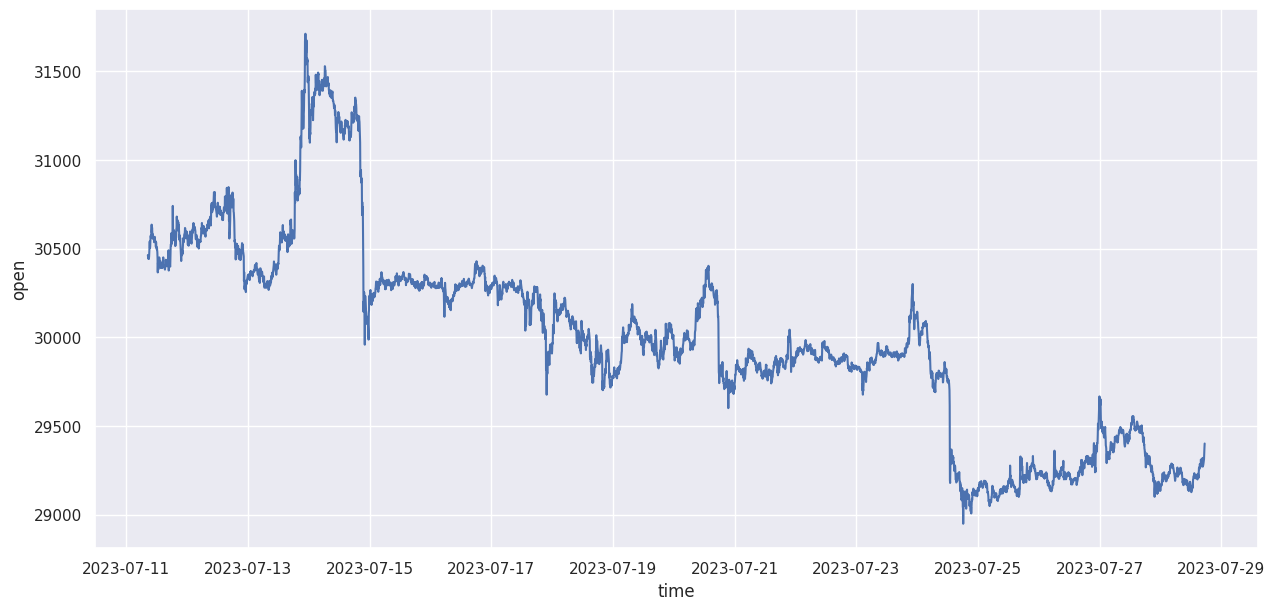

In [93]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x='time',y='open')

# Correlation between trades and open price

<Axes: xlabel='open', ylabel='trades'>

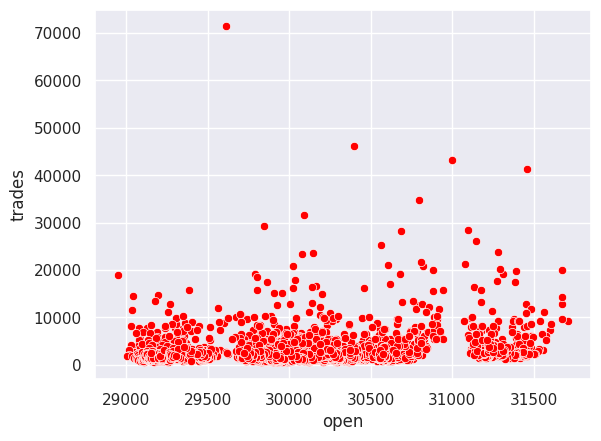

In [94]:
sns.scatterplot(data=df, x='open',y='trades',c='red')

# CREATING TIME TREND FEATURE

In [95]:
df['trend_2']=df.trend**2
df['trend_3']=df.trend**3
df['trend_4']=df.trend**4
X_time_trend=df[['trend','trend_2','trend_3','trend_4']]
y=df['open']

In [96]:
y_dummy = np.ones(len(y))*y.mean()

In [97]:
def check_model_full(model, X, y):
    model.fit(X, y)
    y_pred_1 = model.predict(X)
    print(f'r2 {r2_score(y,y_pred_1)}, absolute {mean_absolute_error(y,y_pred_1)}')
    sns.lineplot(data=df[len(df)-len(y):],x='time',y='open')
    sns.lineplot(x=df[len(df)-len(y):].time,y=y_pred_1,c='red')
    return y_pred_1

/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+08, tolerance: 1.528e+05
  model = cd_fast.enet_coordinate_descent(


r2 0.7693649676117493, absolute 195.86373901367188


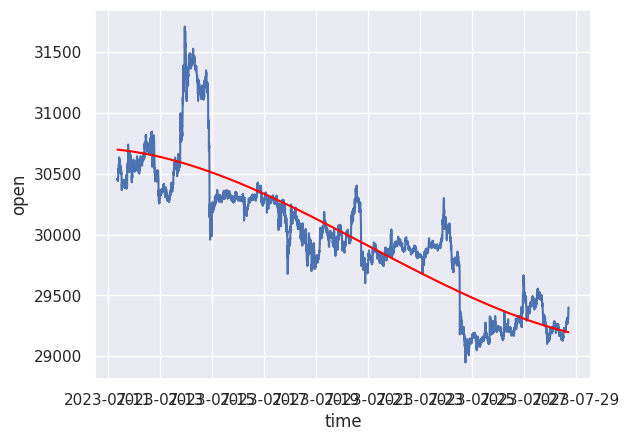

In [98]:
linear = check_model_full(Lasso(max_iter=1000), X_time_trend, y)

r2 0.9680565043171433, absolute 70.64921569824219


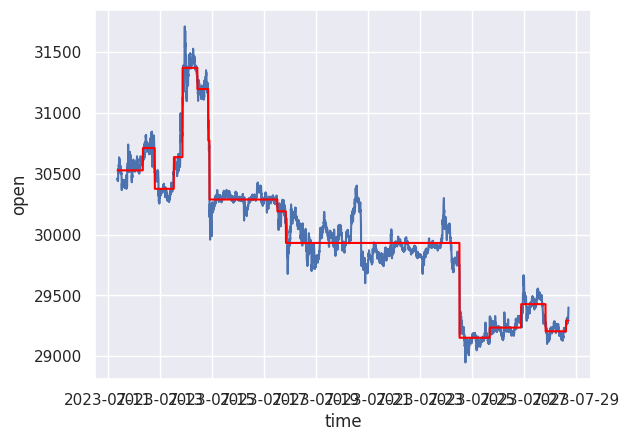

In [99]:
tree = check_model_full(XGBRegressor(n_estimators=2, max_depth=4, learning_rate=1), X_time_trend, y)

# CREATE MOVING AVERAGE

In [100]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()
    rolling_variance = series.rolling(window=window).std()
    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    return rolling_mean, rolling_variance

# weekly average 

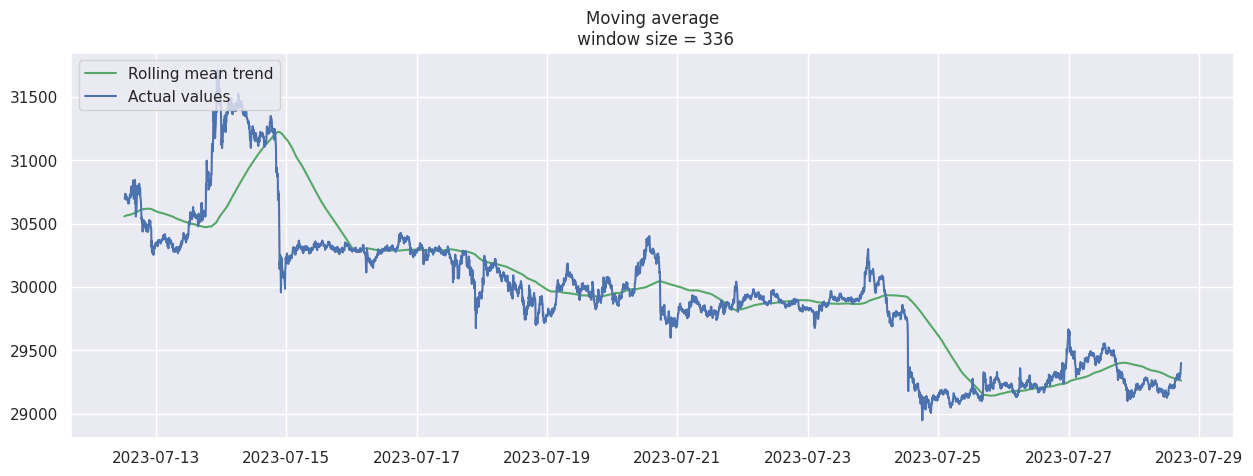

In [101]:
days=7
mov_av_w, mov_var_w = plotMovingAverage(y,int(48*days))

In [102]:
print(f'r2 {r2_score(y[int(288*days):],mov_av_w[int(288*days):])}, '
      f'absolute {mean_absolute_error(y[int(288*days):],mov_av_w[int(288*days):])}')

r2 0.6933998691244436, absolute 136.9799478501338


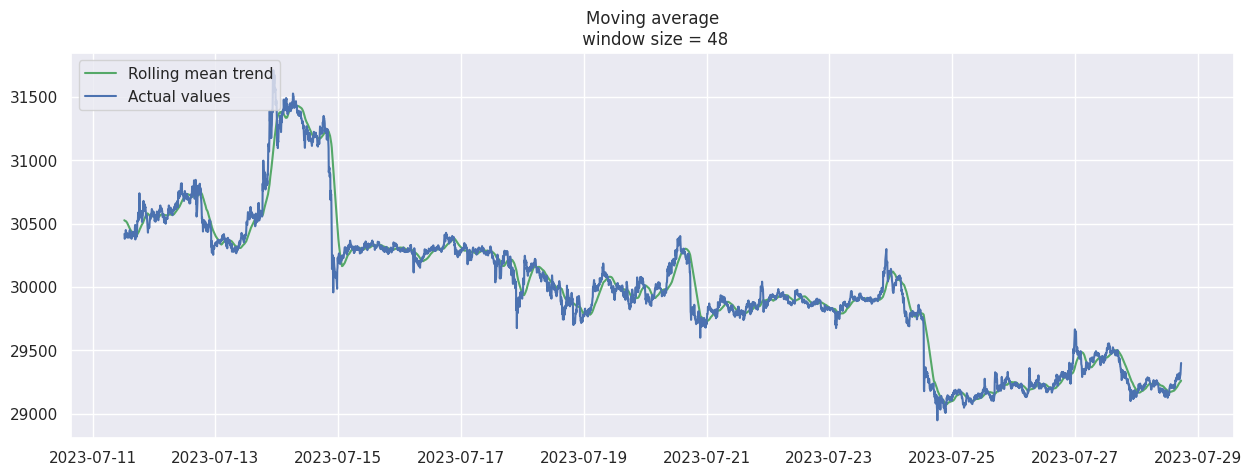

In [103]:
days=1
mov_av_d, mov_var_d = plotMovingAverage(y,int(48*days))

In [104]:
print(f'r2 {r2_score(y[int(288*days):],mov_av_d[int(288*days):])}, '
      f'absolute {mean_absolute_error(y[int(288*days):],mov_av_d[int(288*days):])}')

r2 0.965471059008295, absolute 60.7938701531494


In [105]:
X=X_time_trend.copy()
X['trades'] = (df.trades-df.trades.mean())/df.trades.std()
X['linear_trend'] = linear
X['tree_trend'] = tree
X['moving_average_weekly'] = mov_av_w
X['moving_average_daily'] = mov_av_d
X['moving_variance_weekly'] = mov_var_w
X['moving_variance_daily'] = mov_var_d
X['time'] = df.time

In [106]:
X.tail(5)

,trend,trend_2,trend_3,trend_4,trades,linear_trend,tree_trend,moving_average_weekly,moving_average_daily,moving_variance_weekly,moving_variance_daily,time
open_time,,,,,,,,,,,,
2023-07-28 17:05:00,4999.0,24990000.0,1.249250e+11,6.245001e+14,-0.246700,29197.519531,29292.753906,29263.853818,29250.326457,107.427560,37.012205,2023-07-28 17:05:00
2023-07-28 17:10:00,5000.0,25000000.0,1.250000e+11,6.250000e+14,1.602342,29197.335938,29292.753906,29263.205514,29252.278564,106.468348,37.770801,2023-07-28 17:10:00
2023-07-28 17:15:00,5001.0,25010000.0,1.250750e+11,6.255002e+14,0.491692,29197.154297,29292.753906,29262.605812,29255.150879,105.382374,40.087903,2023-07-28 17:15:00
2023-07-28 17:20:00,5002.0,25020004.0,1.251501e+11,6.260006e+14,2.002349,29196.972656,29292.753906,29262.105812,29258.130249,104.437591,43.569024,2023-07-28 17:20:00
2023-07-28 17:25:00,5003.0,25030008.0,1.252251e+11,6.265014e+14,-0.588327,29196.789062,29292.753906,29261.737863,29261.794393,103.727620,47.861439,2023-07-28 17:25:00


In [107]:
y

open_time
2023-07-11 08:30:00    30462.050781
2023-07-11 08:35:00    30454.080078
2023-07-11 08:40:00    30460.330078
2023-07-11 08:45:00    30441.150391
2023-07-11 08:50:00    30461.070312
                           ...     
2023-07-28 17:05:00    29304.080078
2023-07-28 17:10:00    29312.380859
2023-07-28 17:15:00    29353.400391
2023-07-28 17:20:00    29376.000000
2023-07-28 17:25:00    29400.339844
Name: open, Length: 5004, dtype: float32

# Seasonal features

In [108]:
def fourier_features(X, freq, order=4):
    X_copy = X.copy()
    time = X.trend
    k =  2 * np.pi * (1 / freq) * time
    for i in range(1, order+1):
        X_copy[f'sin_{i}'] = np.sin(i*k)
        X_copy[f'cos_{i}'] = np.cos(i*k)
    return X_copy

In [109]:
X_fourier = fourier_features(X_time_trend, 365.25*24).drop(['trend','trend_2','trend_3','trend_4'],axis=1)

<Axes: xlabel='open_time'>

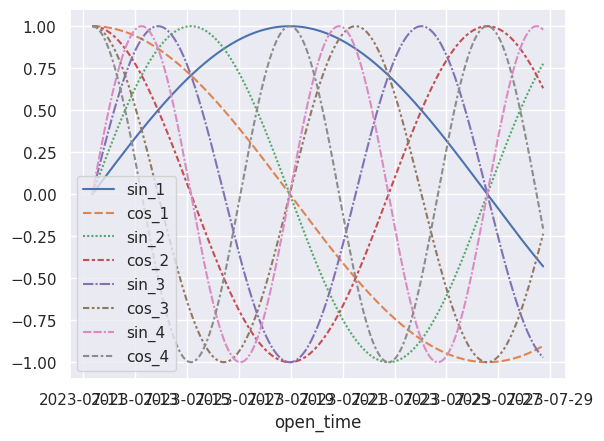

In [110]:
sns.lineplot(data=X_fourier)

In [111]:
X_fourier

,sin_1,cos_1,sin_2,cos_2,sin_3,cos_3,sin_4,cos_4
open_time,,,,,,,,
2023-07-11 08:30:00,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2023-07-11 08:35:00,0.000717,1.000000,0.001434,0.999999,0.002150,0.999998,0.002867,0.999996
2023-07-11 08:40:00,0.001434,0.999999,0.002867,0.999996,0.004301,0.999991,0.005734,0.999984
2023-07-11 08:45:00,0.002150,0.999998,0.004301,0.999991,0.006451,0.999979,0.008601,0.999963
2023-07-11 08:50:00,0.002867,0.999996,0.005734,0.999984,0.008601,0.999963,0.011468,0.999934
...,...,...,...,...,...,...,...,...
2023-07-28 17:05:00,-0.427322,-0.904099,0.772684,0.634791,-0.969843,-0.243729,0.980986,-0.194080
2023-07-28 17:10:00,-0.427970,-0.903793,0.773593,0.633683,-0.970365,-0.241643,0.980425,-0.196892
2023-07-28 17:15:00,-0.428618,-0.903486,0.774500,0.632573,-0.970883,-0.239556,0.979857,-0.199702


r2 0.8275576612361748, absolute 173.08187866210938


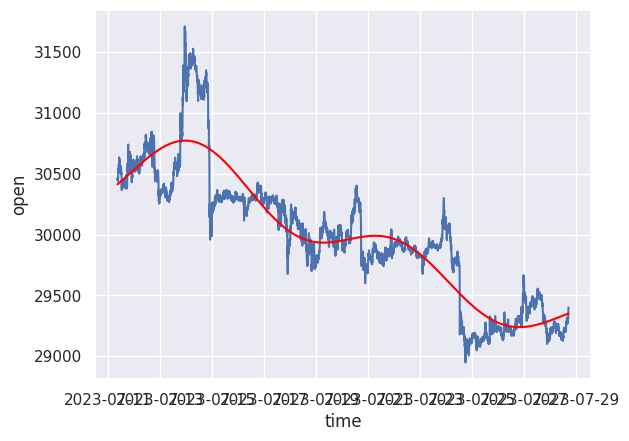

In [112]:
seasonal = check_model_full(Lasso(),X_fourier,y)

In [113]:
X['seasonal'] = seasonal

In [114]:
X.dtypes

trend                            float32
trend_2                          float32
trend_3                          float32
trend_4                          float32
trades                           float32
linear_trend                     float32
tree_trend                       float32
moving_average_weekly            float64
moving_average_daily             float64
moving_variance_weekly           float64
moving_variance_daily            float64
time                      datetime64[ns]
seasonal                         float32
dtype: object

# day of week, day of month, hour of day

In [115]:
dayofmonth = pd.Series(map(lambda x: x.date().day, X.time), index=X.index)
dayofweek = pd.Series(map(lambda x: x.date().weekday(), X.time), index=X.index)
hourofday = pd.Series(map(lambda x: x.time().hour, X.time), index=X.index)

In [116]:
X['day_of_month'] = dayofmonth
X['day_of_week'] = dayofweek
X['hour_of_day'] = hourofday

# Creating 1 day lags

In [117]:
def add_lags(X, interval='1h',count=24):
    X_copy = X.copy()
    if interval == '1h':
        for i in range(1,count+1):
            X_copy[f'lag_{i}h'] = y.shift(i)
    elif interval == '30m':
        for i in range(1,2*count+1):
            X_copy[f'lag_{i}'] = y.shift(i)
    return X_copy

In [118]:
X_lags = add_lags(X_time_trend).drop(['trend','trend_2','trend_3','trend_4'],axis=1)

r2 0.9977375697738317, absolute 16.55664825439453


array([30579.006, 30579.967, 30552.752, ..., 29310.271, 29356.008,
       29374.389], dtype=float32)

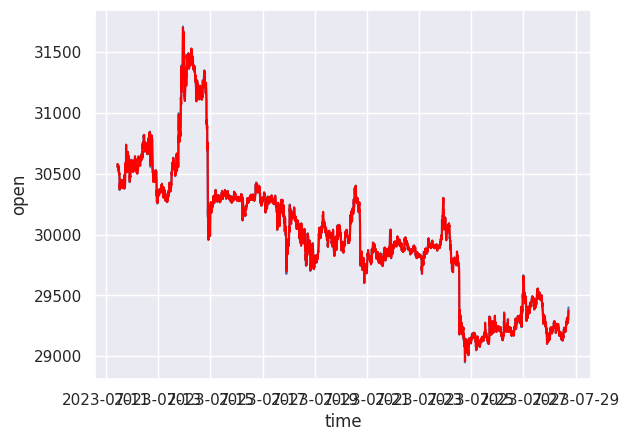

In [119]:
check_model_full(LinearRegression(),X_lags[24:],y[24:])

In [120]:
X=add_lags(X)

In [121]:
X.columns

Index(['trend', 'trend_2', 'trend_3', 'trend_4', 'trades', 'linear_trend',
       'tree_trend', 'moving_average_weekly', 'moving_average_daily',
       'moving_variance_weekly', 'moving_variance_daily', 'time', 'seasonal',
       'day_of_month', 'day_of_week', 'hour_of_day', 'lag_1h', 'lag_2h',
       'lag_3h', 'lag_4h', 'lag_5h', 'lag_6h', 'lag_7h', 'lag_8h', 'lag_9h',
       'lag_10h', 'lag_11h', 'lag_12h', 'lag_13h', 'lag_14h', 'lag_15h',
       'lag_16h', 'lag_17h', 'lag_18h', 'lag_19h', 'lag_20h', 'lag_21h',
       'lag_22h', 'lag_23h', 'lag_24h'],
      dtype='object')

In [122]:
X.tail()

,trend,trend_2,trend_3,trend_4,trades,linear_trend,tree_trend,moving_average_weekly,moving_average_daily,moving_variance_weekly,...,lag_15h,lag_16h,lag_17h,lag_18h,lag_19h,lag_20h,lag_21h,lag_22h,lag_23h,lag_24h
open_time,,,,,,,,,,,,,,,,,,,,,
2023-07-28 17:05:00,4999.0,24990000.0,1.249250e+11,6.245001e+14,-0.246700,29197.519531,29292.753906,29263.853818,29250.326457,107.427560,...,29270.720703,29267.689453,29272.019531,29280.849609,29284.919922,29263.990234,29256.000000,29265.599609,29262.500000,29232.490234
2023-07-28 17:10:00,5000.0,25000000.0,1.250000e+11,6.250000e+14,1.602342,29197.335938,29292.753906,29263.205514,29252.278564,106.468348,...,29309.939453,29270.720703,29267.689453,29272.019531,29280.849609,29284.919922,29263.990234,29256.000000,29265.599609,29262.500000
2023-07-28 17:15:00,5001.0,25010000.0,1.250750e+11,6.255002e+14,0.491692,29197.154297,29292.753906,29262.605812,29255.150879,105.382374,...,29306.009766,29309.939453,29270.720703,29267.689453,29272.019531,29280.849609,29284.919922,29263.990234,29256.000000,29265.599609
2023-07-28 17:20:00,5002.0,25020004.0,1.251501e+11,6.260006e+14,2.002349,29196.972656,29292.753906,29262.105812,29258.130249,104.437591,...,29307.019531,29306.009766,29309.939453,29270.720703,29267.689453,29272.019531,29280.849609,29284.919922,29263.990234,29256.000000
2023-07-28 17:25:00,5003.0,25030008.0,1.252251e+11,6.265014e+14,-0.588327,29196.789062,29292.753906,29261.737863,29261.794393,103.727620,...,29301.720703,29307.019531,29306.009766,29309.939453,29270.720703,29267.689453,29272.019531,29280.849609,29284.919922,29263.990234


# Cross-Validation and choosing final model

In [123]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """

    # get the index after which test set starts
    test_index = int(len(X) * (1 - test_size))

    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [124]:
X['y'] = y
X = X.dropna().drop(['trend_4','time'],axis=1)
y = X['y']
X = X.drop('y',axis=1)

In [132]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.01)

In [133]:
def check_model_with_CV(model):
    print(f'CHECKING {model}')
    print()
    model.fit(X_train, y_train)

    print('Mean absolute error in train')
    print(mean_absolute_error(model.predict(X_train),y_train))
    print('Mean absolute error in test (1 percent of all data)')
    print(mean_absolute_error(model.predict(X_test),y_test))

    cv = cross_val_score(
                model, X_train, y_train, cv=tscv, scoring="neg_mean_absolute_error"
            )
    print()
    print('CROSS VALIDATION')
    for i in range(len(cv)):
        print(f'mean error in {i+1} split: '+ str(-cv[i]))
    return model

CHECKING LinearRegression()

Mean absolute error in train
16.380317918658584
Mean absolute error in test (1 percent of all data)
11.68025552909425

CROSS VALIDATION
mean error in 1 split: 6955.08528588315
mean error in 2 split: 23.458247197989085
mean error in 3 split: 178.3584102238304
mean error in 4 split: 20.270290776936022
mean error in 5 split: 19.402358451746284


<Axes: xlabel='open_time', ylabel='y'>

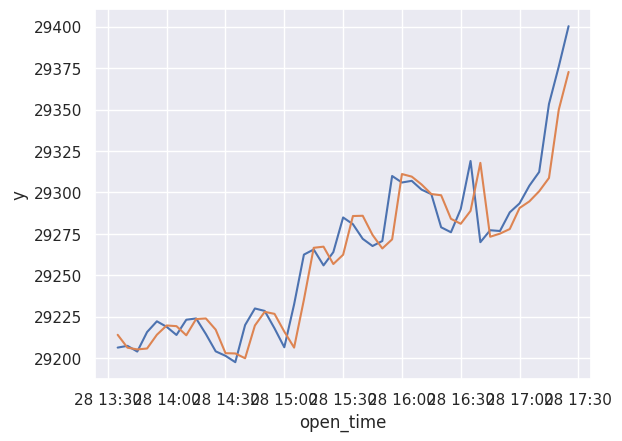

In [134]:
lr = check_model_with_CV(LinearRegression())

sns.lineplot(y_test)
sns.lineplot(pd.Series(lr.predict(X_test), index = y_test.index))

CHECKING RandomForestRegressor(max_depth=5, n_estimators=5)

Mean absolute error in train
19.192431666179804
Mean absolute error in test (1 percent of all data)
12.119675091097962

CROSS VALIDATION
mean error in 1 split: 30.411013333039417
mean error in 2 split: 111.86207332445915
mean error in 3 split: 18.957816723527802
mean error in 4 split: 299.71196475405713
mean error in 5 split: 67.80871289208856


<Axes: xlabel='open_time', ylabel='y'>

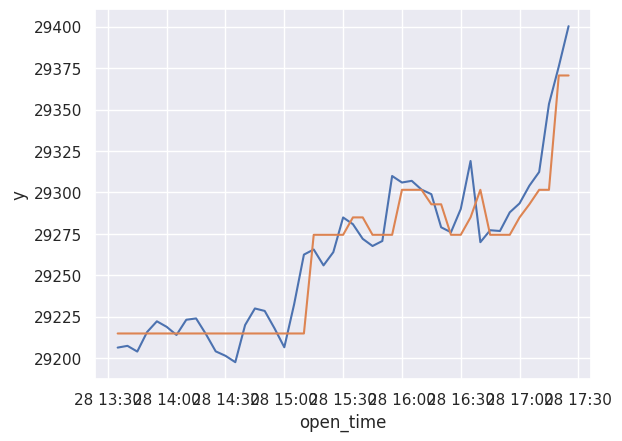

In [135]:
tree = check_model_with_CV(RandomForestRegressor(n_estimators=5, max_depth=5))

sns.lineplot(y_test)
sns.lineplot(pd.Series(tree.predict(X_test), index = y_test.index))

CHECKING Lasso(alpha=5, max_iter=5000)



/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+06, tolerance: 1.387e+05
  model = cd_fast.enet_coordinate_descent(


Mean absolute error in train
16.45277758042898
Mean absolute error in test (1 percent of all data)
11.367113453848628


/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.262e+05, tolerance: 1.510e+04
  model = cd_fast.enet_coordinate_descent(
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+06, tolerance: 4.120e+04
  model = cd_fast.enet_coordinate_descent(



CROSS VALIDATION
mean error in 1 split: 112.04766296411803
mean error in 2 split: 22.835545583333097
mean error in 3 split: 27.656225907398955
mean error in 4 split: 15.480728867787152
mean error in 5 split: 13.385191243621588


<Axes: xlabel='open_time', ylabel='y'>

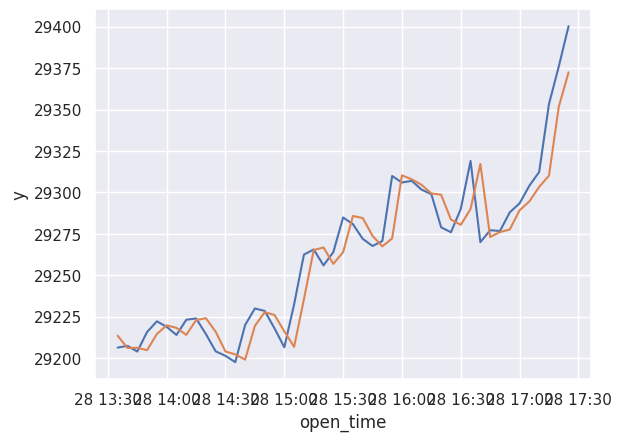

In [136]:
lasso = check_model_with_CV(Lasso(alpha=5,max_iter=5000))

sns.lineplot(y_test)
sns.lineplot(pd.Series(lasso.predict(X_test), index = y_test.index))

CHECKING Ridge(alpha=100, max_iter=5000)

Mean absolute error in train
17.02523035548037
Mean absolute error in test (1 percent of all data)
13.833600775992354

CROSS VALIDATION
mean error in 1 split: 369.8354139991267
mean error in 2 split: 145.28766678065912
mean error in 3 split: 24.07975447230513
mean error in 4 split: 28.19015018187071
mean error in 5 split: 15.211871606276267


/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.85045e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.50902e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.89975e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.33359e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/

<Axes: xlabel='open_time', ylabel='y'>

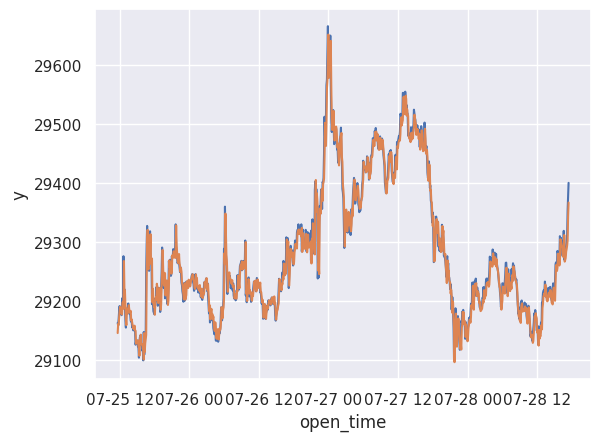

In [130]:
ridge = check_model_with_CV(Ridge(alpha=100,max_iter=5000))

sns.lineplot(y_test)
sns.lineplot(pd.Series(ridge.predict(X_test), index = y_test.index))

# Model evaluation for 1 month

In [143]:
def day_str(day):
    if day<=9:
        return '0'+str(day)
    return str(day)
def month_profit(model_fitted, month,start):
    total_profit = 0
    for day in range(15,30):
        sum_day = 0
        y_day = y[(y.index >= f"{month}-{day_str(day)} 00:00:00") & (y.index <= f"{month}-{day_str(day+1)} 00:00:00")]
        X_day = X[(X.index >= f"{month}-{day_str(day)} 00:00:00") & (X.index <= f"{month}-{day_str(day+1)} 00:00:00")]
        if len(y_day)>0:
            y_pred = model_fitted.predict(X_day)
        for i in range(1, len(y_day)):
            #if True:
            if y_pred[i]-y_day[i-1]>0:
                sum_day += ((start)*(y_day[i]/y_day[i-1]-1))
                start+=((start)*(y_day[i]/y_day[i-1]-1))
            if y_pred[i]-y_day[i-1]<=0:
                #pass
                sum_day += -((start)*(y_day[i]/y_day[i-1]-1))
                start+=-((start)*(y_day[i]/y_day[i-1]-1))
        print(f'Profit for day {day} is {sum_day}. Current money: {start}')
        total_profit += sum_day
    print()
    print()
    return start

In [146]:
month='2023-07'
print(f'Total profit for {month} is {month_profit(lr,month,100)-100}')

Profit for day 15 is 2.2673403468885316. Current money: 102.2673403468886
Profit for day 16 is 1.6960708005639655. Current money: 103.96341114745248
Profit for day 17 is 4.616117914164874. Current money: 108.57952906161734
Profit for day 18 is 3.481094074352983. Current money: 112.0606231359702
Profit for day 19 is 2.369152577873399. Current money: 114.42977571384358
Profit for day 20 is 0.6207230068519944. Current money: 115.05049872069567
Profit for day 21 is 1.9513007020261388. Current money: 117.00179942272175
Profit for day 22 is 0.18393834358198685. Current money: 117.18573776630365
Profit for day 23 is 0.23552591749422286. Current money: 117.42126368379786
Profit for day 24 is 6.165526149702676. Current money: 123.58678983350059
Profit for day 25 is 2.4395032160083745. Current money: 126.02629304950887
Profit for day 26 is 3.1464455824895823. Current money: 129.17273863199856
Profit for day 27 is 3.8404754450885057. Current money: 133.01321407708693
Profit for day 28 is 1.710907

# Model evaluation for 1 day

In [58]:
def eval_one_day(model,date, start):
    total_profit = 0
    y_day = y[(y.index>=f'{date} 00:00:00') & (y.index <=f'{date} 23:59:00')]
    X_day = X[(X.index>=f'{date} 00:00:00') & (X.index <=f'{date} 23:59:00')]
    y_pred = model.predict(X_day)
    sum_day=0
    for i in range(1,len(y_day)):
        if y_pred[i]-y_day[i-1]>0:
        #if True:
            sum_day += ((start)*(y_day[i]/y_day[i-1]-1))
            start += ((start)*(y_day[i]/y_day[i-1]-1))
            print(f'Profit: {((start)*(y_day[i]/y_day[i-1]-1))}, current money: {start}')
        else:
            sum_day += ((start)*(y_day[i]/y_day[i-1]-1))
            start += -((start)*(y_day[i]/y_day[i-1]-1))
            print(f'Profit: {-((start)*(y_day[i]/y_day[i-1]-1))}, current money: {start}')
    return start

In [140]:
print(f'Total profit is {eval_one_day(ridge,"2023-07-24",100)}')

Profit: 0.024819570674949887, current money: 100.02481341362
Profit: 0.0568854076747098, current money: 100.08166650657131
Profit: 0.10148949466682454, current money: 100.18305329231369
Profit: 0.0078888078745531, current money: 100.19094147909027
Profit: 0.10751279182673497, current money: 100.29833914814097
Profit: 0.03846084272666045, current money: 100.33678525380365
Profit: 0.04671179007310623, current money: 100.38347531742782
Profit: 0.13359341888621556, current money: 100.51689141772886
Profit: 0.06654713628041112, current money: 100.58339455476522
Profit: 0.01174604164015292, current money: 100.5951392250331
Profit: 0.03976277478035955, current money: 100.63488629498336
Profit: -0.006993539475569442, current money: 100.62789226942989
Profit: -0.049554129907373075, current money: 100.5783137125645
Profit: -0.04061725111889495, current money: 100.53768004543261
Profit: -0.09340823723197161, current money: 100.44418486219907
Profit: -0.03345584350116114, current money: 100.410717

# Classification (ascending or not)

In [114]:
y, X.lag_1h

(open_time
 2023-04-04 19:30:00    28059.109375
 2023-04-04 20:00:00    28098.980469
 2023-04-04 20:30:00    28140.250000
 2023-04-04 21:00:00    28226.980469
 2023-04-04 21:30:00    28123.179688
                            ...     
 2023-07-25 14:30:00    29157.449219
 2023-07-25 15:00:00    29128.289062
 2023-07-25 15:30:00    29138.619141
 2023-07-25 16:00:00    29118.009766
 2023-07-25 16:30:00    29144.000000
 Name: y, Length: 5371, dtype: float32,
 open_time
 2023-04-04 19:30:00    28030.050781
 2023-04-04 20:00:00    28059.109375
 2023-04-04 20:30:00    28098.980469
 2023-04-04 21:00:00    28140.250000
 2023-04-04 21:30:00    28226.980469
                            ...     
 2023-07-25 14:30:00    29165.000000
 2023-07-25 15:00:00    29157.449219
 2023-07-25 15:30:00    29128.289062
 2023-07-25 16:00:00    29138.619141
 2023-07-25 16:30:00    29118.009766
 Name: lag_1h, Length: 5371, dtype: float32)

In [115]:
y_asc = y>X.lag_1h

In [116]:
best_model = lasso
y_asc_predict = best_model.predict(X) > X.lag_1h

In [117]:
accuracy_score(y_asc,y_asc_predict)#very poor quality of price prediction accuracy,so lets try to use classification

0.5306274436790169

In [118]:
y_asc_train = y_train>X_train.lag_1h
y_asc_test = y_test>X_test.lag_1h

In [119]:
class_model1 = LogisticRegression()

class_model1.fit(X_train, y_asc_train)
accuracy_score(y_asc_test,class_model1.predict(X_test))
accuracy_score(y_asc_train,class_model1.predict(X_train))

0.5059582919563058

In [120]:
class_model2 = RandomForestClassifier(max_depth=5)

class_model2.fit(X_train, y_asc_train)
print(precision_score(y_asc_test,class_model2.predict(X_test)))
print(precision_score(y_asc_train,class_model2.predict(X_train)))

0.5159574468085106
0.6572025052192066


In [121]:
class_model3 = MLPClassifier()

class_model3.fit(X_train, y_asc_train)
print(precision_score(y_asc_test,class_model3.predict(X_test)))
print(precision_score(y_asc_train,class_model3.predict(X_train)))

0.4996276991809382
0.5059582919563058
